In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class CONFIG:
    DATA_DIR = "F:/Data/UPSELL_V4/"
    DATA_PATH = DATA_DIR + "FEATURE_V3_TEST_202303301618_data.csv"
    COL_TO_DROP = ['CUSTOMER_CODE', 'RANK_', 'CUSTOMER_CODE_INFO', 'LOAN_WID', 'THANG', 'CREATED_DT', 'LOAN_DPD', 'LAST_DATE', 'FIRST_DATE', 'MIN_DISB_DATE', 'DISBURSE_DATE_WID']

In [3]:
data = pd.read_csv(CONFIG.DATA_PATH, usecols=lambda x: x not in CONFIG.COL_TO_DROP)

C:\Users\duclh3\AppData\Local\Temp\ipykernel_25012\3653622828.py:1: DtypeWarning: Columns (119) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(CONFIG.DATA_PATH, usecols=lambda x: x not in CONFIG.COL_TO_DROP)


In [4]:
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], format='%Y%m%d')
data['NEXT_DISBURSE_DATE_WID'] = pd.to_datetime(data['NEXT_DISBURSE_DATE_WID'], format='%Y%m%d')

In [5]:
null_cols = data.isnull().sum()/ data.shape[0]*100
null_cols.sort_values(ascending=False)

B_SCORE                 95.350136
SALARY_TYPE_CODE        83.914432
MONTHLY_INCOME_VALUE    77.552353
A_SCORE                 75.158172
TIME_TO_CONTRACT_3M     74.798078
                          ...    
AVG_LTV_3M               0.000000
NO_RETRUCTURE            0.000000
NO_RETRUCTURE_12M        0.000000
NO_RETRUCTURE_9M         0.000000
TIME_TO_DISBURSE         0.000000
Length: 116, dtype: float64

In [6]:
data.describe()

TIME_TO_DISBURSE    LOAN_STATUS     CURENT_LTV  INCREASE_RATIO  \
count     931425.000000  931425.000000  931425.000000   273680.000000   
mean           4.247467       0.921274       0.558299        0.060850   
std            3.431793       0.269310       0.161463        0.164767   
min            1.000000       0.000000       0.000000       -1.073975   
25%            2.000000       1.000000       0.476190       -0.003154   
50%            3.000000       1.000000       0.613208        0.032897   
75%            6.000000       1.000000       0.650000        0.145005   
max           45.000000       1.000000       3.200000        2.444444   

         CURRENT_DPD  PRINCIPAL_REMAIN    MAX_DPD_EVR    MAX_DPD_12M  \
count  858098.000000      8.623800e+05  931425.000000  931425.000000   
mean       -9.594133      1.502411e+07       1.808095       1.808095   
std        15.747412      4.243554e+07      12.144320      12.144320   
min      -845.000000      0.000000e+00    -268.000000    -268.000000   
25%       -19.000000      3.934717e+06      -1.000000      -1.000000   
50%        -9.000000      7.474792e+06       0.000000       0.000000   
75%         0.000000      1.267068e+07       1.000000       1.000000   
max      1184.000000      3.200000e+09    1184.000000    1184.000000   

          MAX_DPD_9M     MAX_DPD_6M  ...  THOI_GIAN_DA_VAY  CO_THE_VAY_THEM  \
count  931425.000000  931425.000000  ...     931425.000000     8.623760e+05   
mean        1.802838       1.697065  ...        137.804145     1.075420e+07   
std        12.141749      12.086050  ...         77.920116     3.411783e+07   
min      -268.000000    -268.000000  ...         59.000000    -8.828000e+08   
25%        -1.000000      -1.000000  ...         62.000000     2.797517e+06   
50%         0.000000       0.000000  ...        122.000000     5.748480e+06   
75%         1.000000       1.000000  ...        182.000000     1.088623e+07   
max      1184.000000    1184.000000  ...       1522.000000     1.793965e+10   

       THOI_GIAN_VAY_TB  DAYS_FROM_MAX_DISB            AGE  WORKPLACE_CODE  \
count     315818.000000       315818.000000  931425.000000   382196.000000   
mean           3.096047          124.375264      33.849779        1.645962   
std            2.329405          105.645592       9.590419        0.478221   
min            0.000000            0.000000       0.000000        1.000000   
25%            1.370000           63.000000      27.000000        1.000000   
50%            2.680000          108.000000      32.000000        2.000000   
75%            4.390000          170.000000      39.000000        2.000000   
max           44.870000         1805.000000      81.000000        2.000000   

             PAPER_ID  NUMBER_OF_CHILD  MONTHLY_INCOME_VALUE  SALARY_TYPE_CODE  
count   859893.000000    366062.000000          2.090830e+05     149825.000000  
mean      1022.566237         0.795524          2.928555e+06     437063.934157  
std      31937.639531         0.925577          8.425563e+06     496024.193049  
min          1.000000         0.000000          0.000000e+00          1.000000  
25%          1.000000         0.000000          0.000000e+00          1.000000  
50%          1.000000         0.000000          0.000000e+00          2.000000  
75%          1.000000         2.000000          0.000000e+00    1000000.000000  
max    1000000.000000        23.000000          7.000000e+08    1000000.000000  

[8 rows x 102 columns]

In [7]:
data['IS_UPSELL_NEXT_3_MONTHS'] = (data['TIME_TO_DISBURSE'] <= 3).astype(int)

In [8]:
date_time = sorted(data['DATE_TIME'].unique())

In [9]:
data.drop_duplicates(subset=['DATE_TIME', 'CUSTOMER_CODE_2'], keep=False,inplace=True)

In [10]:
data = data[data['MAX_ASSET_VALUE']<10e11]

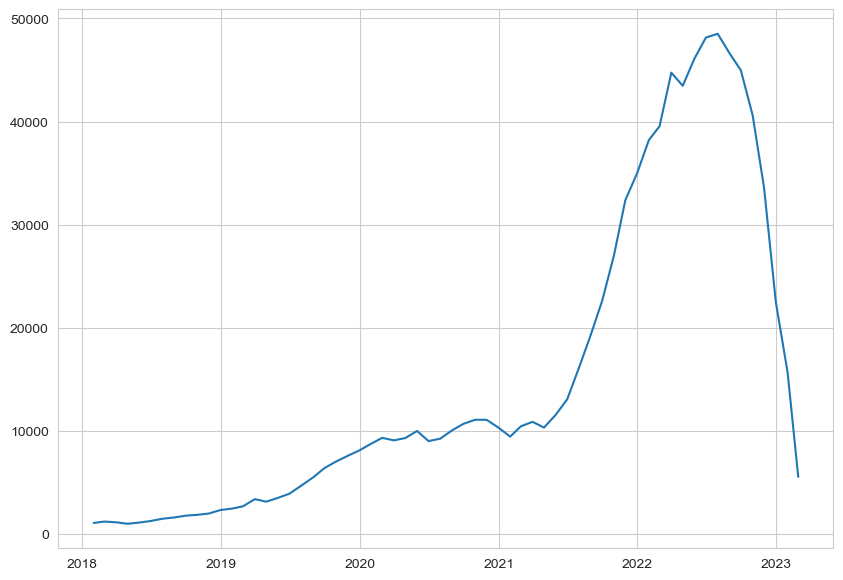

In [11]:
plt.figure(figsize=(10,7))
x = data.groupby('DATE_TIME')['CUSTOMER_CODE_2'].nunique().sort_index().reset_index()
plt.plot(x['DATE_TIME'],x['CUSTOMER_CODE_2'])

In [12]:
test_df = data[data.DATE_TIME>=pd.to_datetime('2022-01-31')]

In [13]:
train_df = data[data.DATE_TIME < pd.to_datetime('2022-01-31')]

In [14]:
test_df.CUSTOMER_CODE_2.nunique()

116425

In [15]:
test_df.IS_UPSELL_NEXT_3_MONTHS.value_counts()

1    310618
0    207591
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64

In [16]:
train_df.IS_UPSELL_NEXT_3_MONTHS.value_counts()

0    236347
1    176690
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64

In [17]:
test_df.to_csv(CONFIG.DATA_DIR + 'test.csv', index=False)
train_df.to_csv(CONFIG.DATA_DIR + 'train.csv', index=False)

<AxesSubplot:xlabel='TIME_TO_DISBURSE', ylabel='Proportion'>

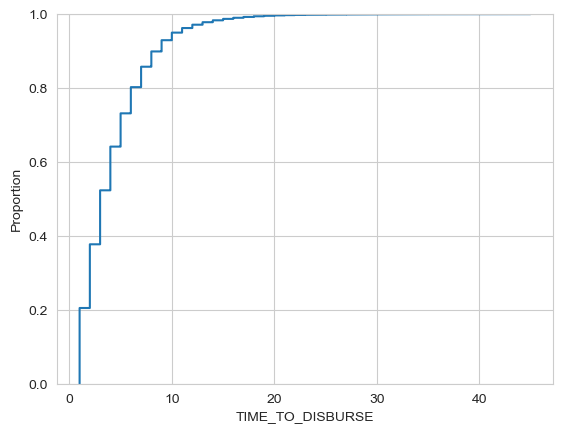

In [18]:
sns.ecdfplot(data['TIME_TO_DISBURSE'])